 # **Huấn luyện Mô hình nhận dạng Ký hiệu Tay ASL A, B và C**
 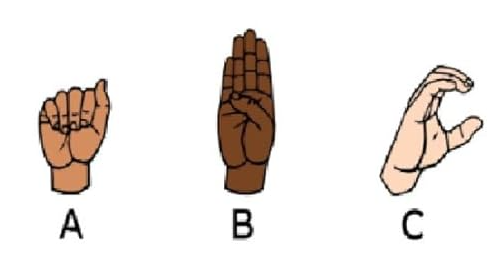 
 # **Decision Tree Classifier for ASL Hand Signs Recognition**



## **Bước 1: Lấy hình ảnh**
Đầu tiên, chúng ta sử dụng thư viện `everywhereml` để lấy và quản lý tập dữ liệu hình ảnh.

Ở đây, chúng ta tạo một đối tượng `ImageDataset` từ các thư mục lồng nhau chứa hình ảnh. Thư mục cơ sở là` 'dataset_folder'`, và tập dữ liệu sẽ được đặt tên là `'Objects'`.

In [1]:

from everywhereml.data import ImageDataset
from everywhereml.data.collect import MjpegCollector

base_folder = 'dataset_folder'

# if our dataset folder already exists, load it
image_dataset = ImageDataset.from_nested_folders(
    name='Objects', 
    base_folder=base_folder
)
  
print(image_dataset)

c:\nam4_THUCTAPCHUYENSAU\Detection\Detection\Python\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImageDataset[Objects](num_images=1500, num_labels=3, labels=['A', 'B', 'C'])


## **Bước 2: Chuyển đổi hình ảnh qua ảnh xám**
Chúng ta sẽ xem trước các hình ảnh và sau đó chuyển chúng thành `ảnh xám` (grayscale).

Sử dụng phương thức `preview`, chúng ta hiển thị trước các hình ảnh từ tập dữ liệu để kiểm tra. Sau đó, tất cả hình ảnh được chuyển sang ảnh xám và hiển thị lại.

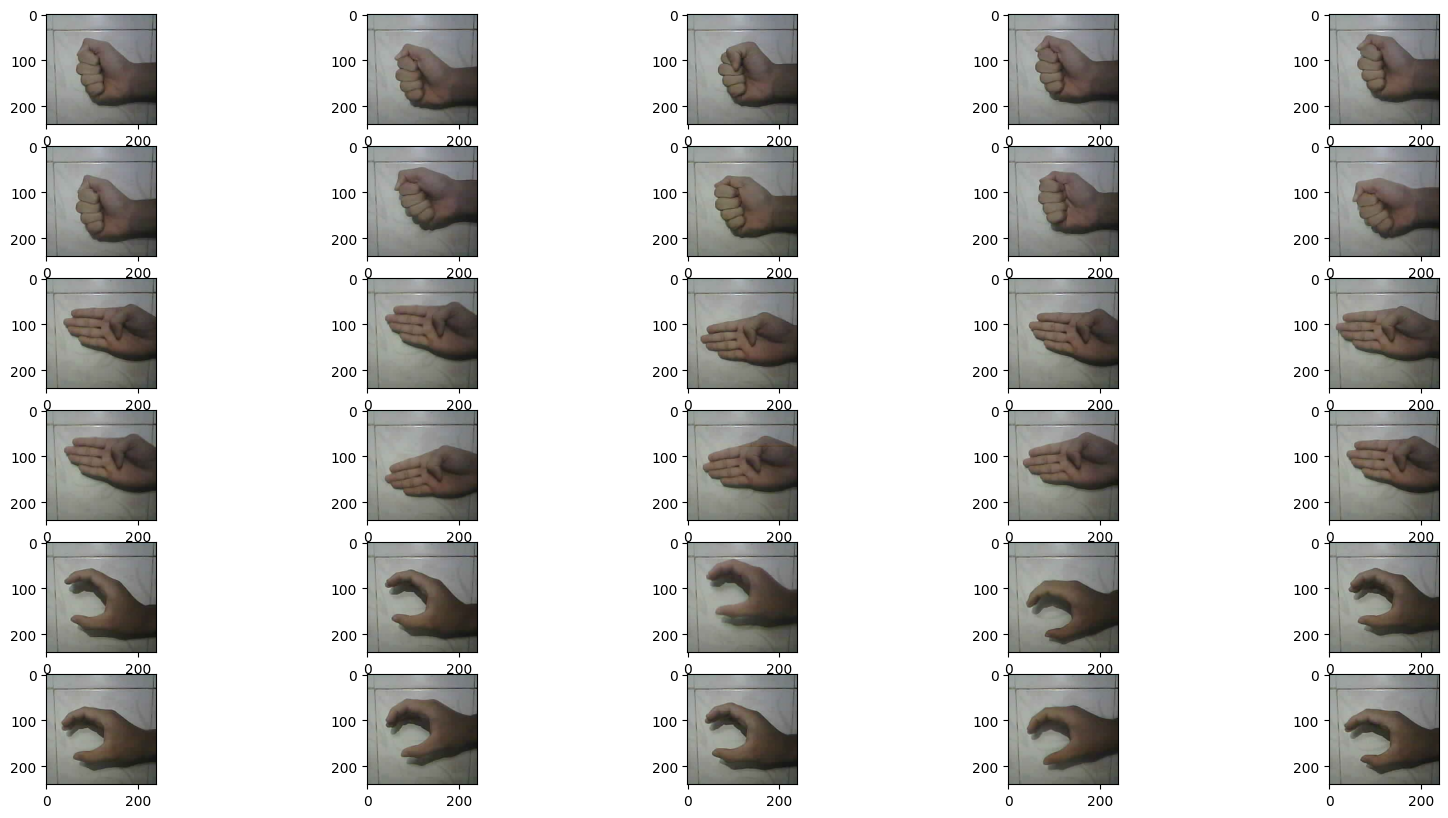

In [2]:
# Preview images
image_dataset.preview(
    samples_per_class=10, 
    rows_per_class=2, 
    figsize=(20, 10)
)
# Chuyển qua ảnh xám
image_dataset = image_dataset.gray().uint8()

#Preview grayscale images

image_dataset.preview(
    samples_per_class=10, 
    rows_per_class=2, 
    figsize=(20, 10), 
    cmap='gray'
)

In [3]:
# Chuyển qua ảnh xám
image_dataset = image_dataset.gray().uint8()

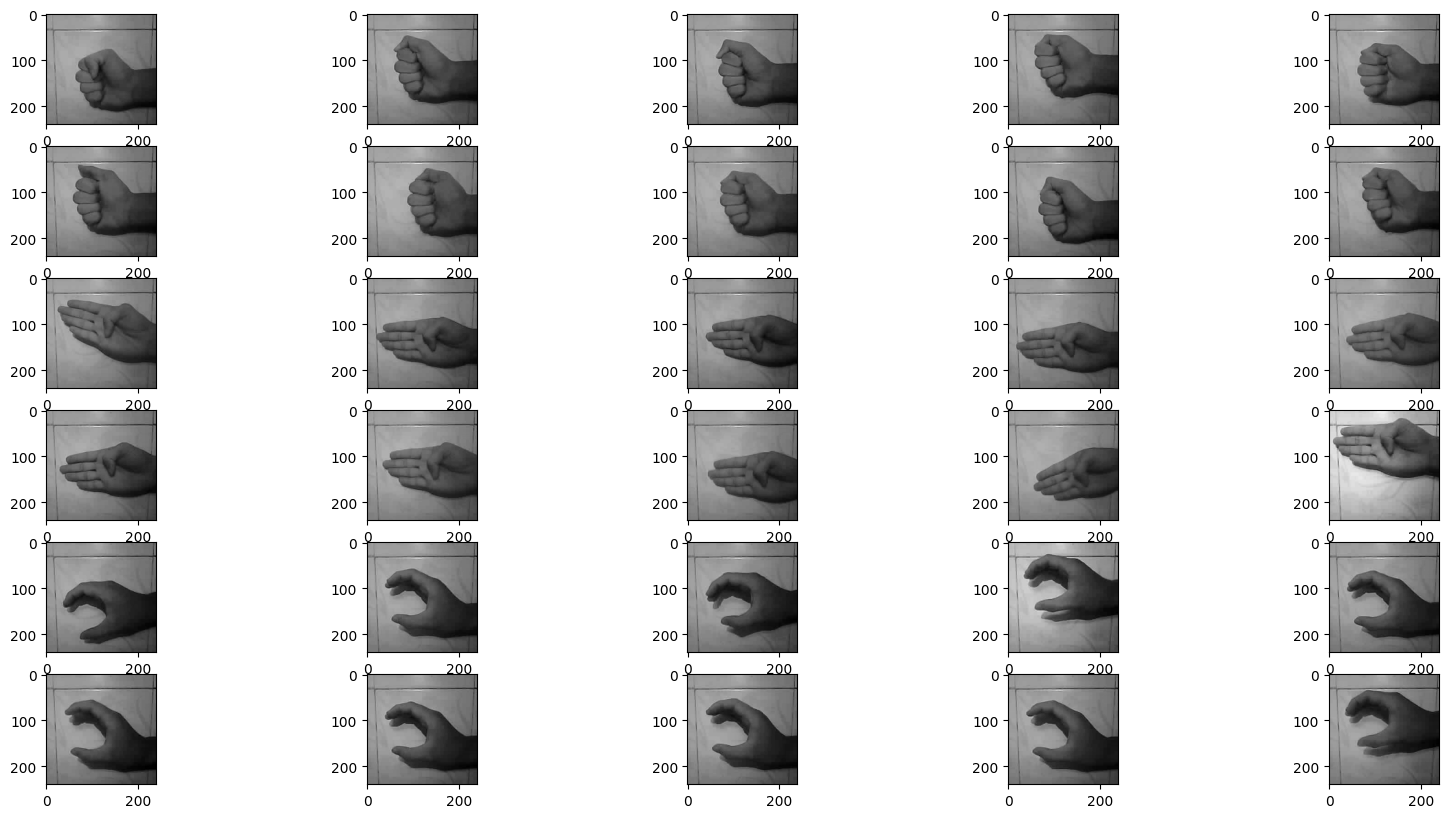

In [4]:

#Preview grayscale images

image_dataset.preview(
    samples_per_class=10, 
    rows_per_class=2, 
    figsize=(20, 10), 
    cmap='gray'
)

## **Bước 3: Tiền xử lý và trích xuất đặc trưng**
Chúng ta sẽ sử dụng **HogPipeline** để tiền xử lý hình ảnh và trích xuất các đặc trưng.

Ở đây, chúng ta thiết lập **HogPipeline** với các bước chuyển đổi bao gồm `thay đổi kích thước hình ảnh`. Các hình ảnh sau đó được `chuyển đổi thành các vector đặc trưng` sử dụng **pipeline.fit_transform**. Các đặc trưng được mô tả và hiển thị dưới dạng biểu đồ **pairplot và UMAP**.

In [5]:

# Thiết lập HOG với các tham số chi tiết
from everywhereml.preprocessing.image.object_detection import HogPipeline
from everywhereml.preprocessing.image.transform import Resize

pipeline = HogPipeline(
    transforms=[
        Resize(width=28, height=28)
    ]
)
# Chuyển đổi các hình ảnh thành các vector đặc trưng
feature_dataset = pipeline.fit_transform(image_dataset)
feature_dataset.describe()

# Hiển thị mô tả của pipeline
print(pipeline)

HOG: 100%|██████████| 1500/1500 [00:03<00:00, 429.61it/s]


,hog0,hog1,hog2,hog3,hog4,hog5,hog6,hog7,hog8,hog9,...,hog81,hog82,hog83,hog84,hog85,hog86,hog87,hog88,hog89,target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.0,1500.0,1500.0,1500.0,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.058372,0.091268,0.240239,0.208804,0.389448,0.285850,0.108420,0.032182,0.019188,0.038600,...,0.0,0.0,0.0,0.0,0.03099,0.170936,0.689993,0.628815,0.397769,1.000000
std,0.043440,0.053321,0.114579,0.097871,0.178452,0.139318,0.115964,0.075124,0.066676,0.024304,...,0.0,0.0,0.0,0.0,0.15982,0.290420,0.377172,0.396007,0.345029,0.816769
min,0.000000,0.000000,0.041356,0.027617,0.022839,0.031359,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025901,0.052583,0.144735,0.130028,0.238364,0.177354,0.042009,0.000000,0.000000,0.022656,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.398704,0.296839,0.000000,0.000000
50%,0.047923,0.084506,0.232016,0.208439,0.397538,0.275058,0.078943,0.000000,0.000000,0.038606,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.946934,0.831283,0.422020,1.000000
75%,0.086272,0.125101,0.321217,0.281824,0.525966,0.387864,0.116304,0.032239,0.000000,0.047928,...,0.0,0.0,0.0,0.0,0.00000,0.275573,1.000000,1.000000,0.684462,2.000000
max,0.218114,0.444634,0.628693,1.000000,0.816560,0.844199,0.651704,0.549901,0.498286,0.153609,...,0.0,0.0,0.0,0.0,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000


In [6]:
# Hiển thị mô tả của pipeline
print(pipeline)

ImagePipeline: HogPipeline
---------
 - Resize(from=(240, 240), to=(28, 28), pixformat=gray)
 > HOG(block_size=8, bins=9, cell_size=3)


c:\nam4_THUCTAPCHUYENSAU\Detection\Detection\Python\.conda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [81 82 83 84] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\nam4_THUCTAPCHUYENSAU\Detection\Detection\Python\.conda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


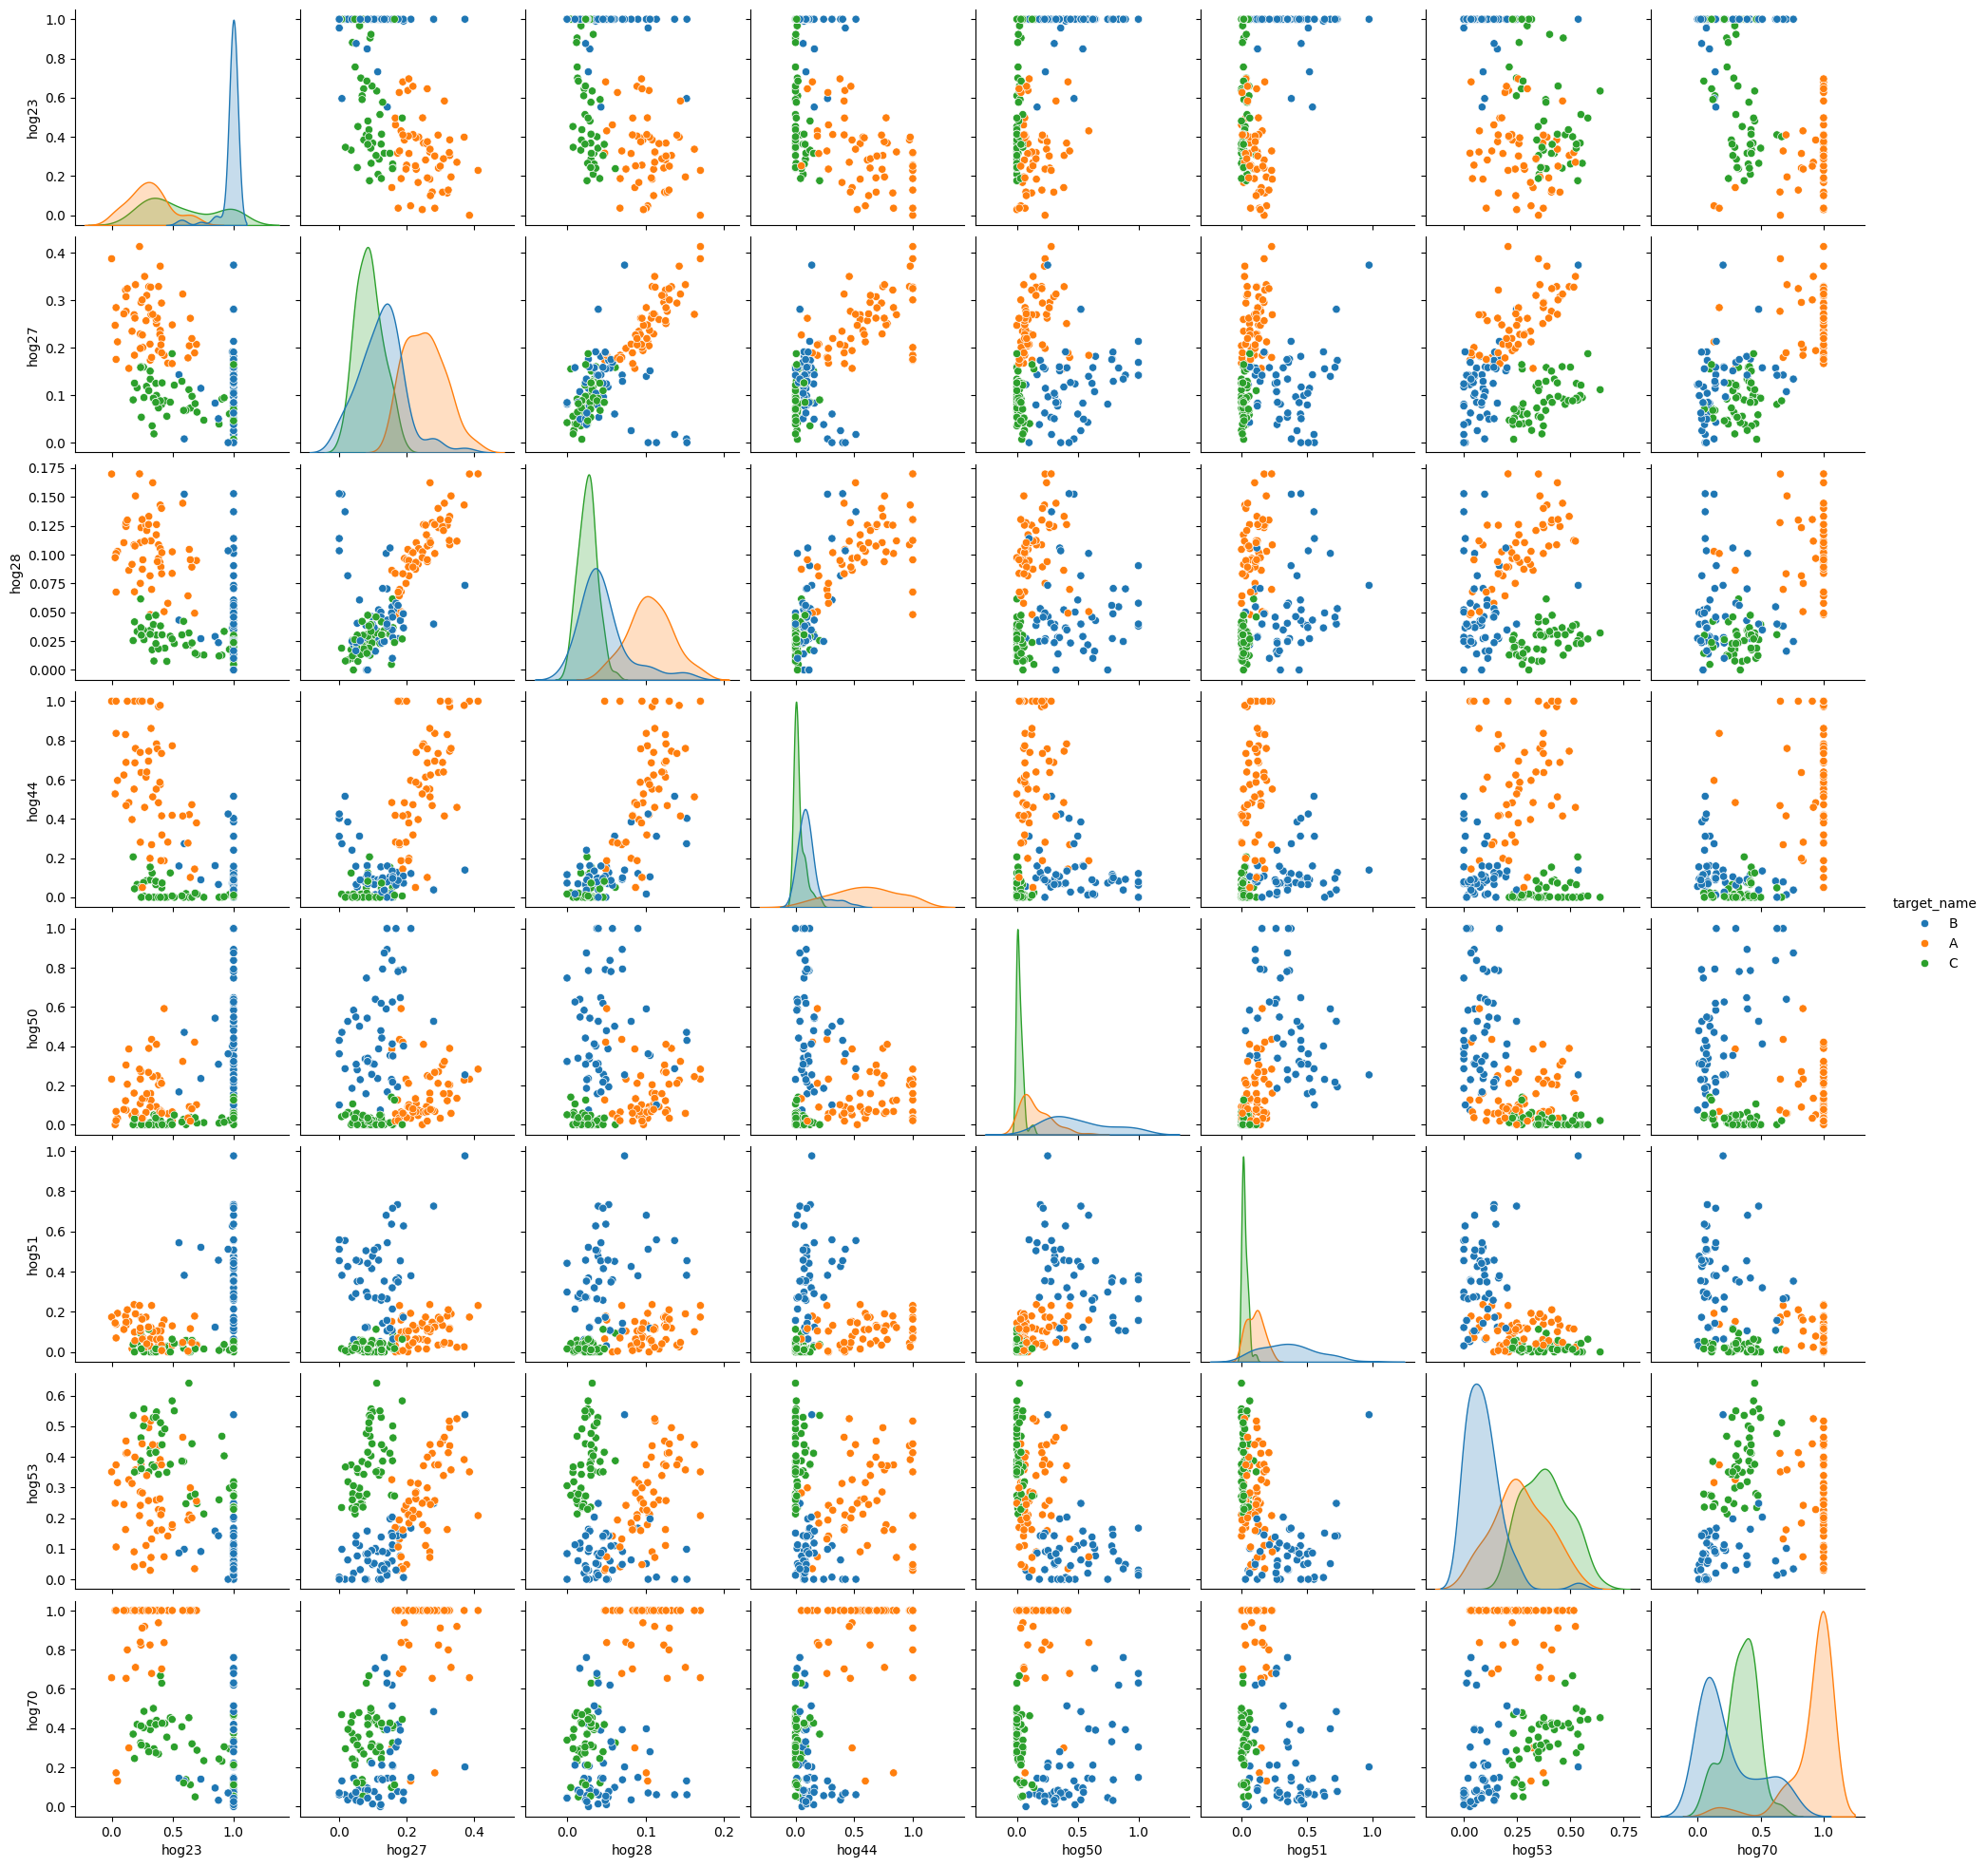

In [7]:
# Vẽ pairplot của các đặc trưng
feature_dataset.plot.features_pairplot(n=200, k=8)



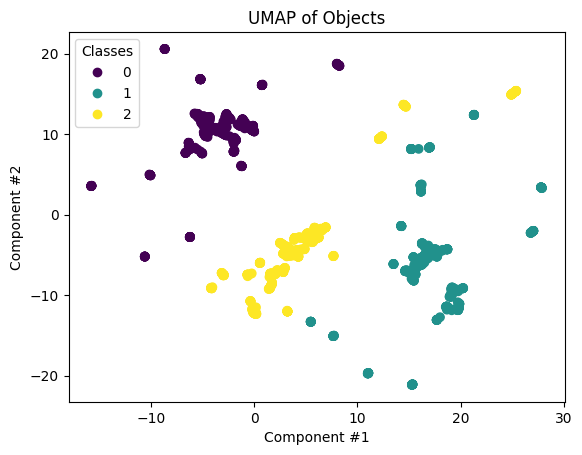

In [8]:
# Vẽ UMAP của các đặc trưng
feature_dataset.plot.umap()

## **Bước 4: Huấn luyện  DecisionTreeClassifier**
Chúng ta sẽ huấn luyện một mô hình **DecisionTreeClassifier** trên tập dữ liệu đặc trưng đã được trích xuất.

Ở đây, chúng ta chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ `70-30`, đảm bảo tỷ lệ lớp được bảo toàn.

Sau đó, khởi tạo và huấn luyện mô hình **DecisionTreeClassifier** với độ sâu tối đa là `30`. Độ chính xác của mô hình trên tập kiểm tra được hiển thị.

In [9]:
from everywhereml.sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 70-30 và bảo toàn tỷ lệ lớp
X_train, X_test, y_train, y_test = train_test_split(
    feature_dataset.X, feature_dataset.y, test_size=0.3, stratify=feature_dataset.y)

# In số lượng mẫu trong mỗi lớp trên tập kiểm tra
unique_labels, counts = np.unique(y_test, return_counts=True)
print("Số lượng mẫu Test trong mỗi lớp trên tập kiểm tra:")
for label, count in zip(unique_labels, counts):
    print(f"Lớp {label}: {count} mẫu")

# Khởi tạo mô hình Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=30)

# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)

# Hiển thị độ chính xác của mô hình trên tập kiểm tra
accuracy = clf.score(X_test, y_test)
print('Score on test set: %2f' % accuracy)


Số lượng mẫu Test trong mỗi lớp trên tập kiểm tra:
Lớp 0: 150 mẫu
Lớp 1: 150 mẫu
Lớp 2: 150 mẫu
Score on test set: 0.986667


### **Hiển thị cây quyết định và ma trận nhầm lẫn**
Trực quan hóa cây quyết định và ma trận nhầm lẫn để kiểm tra hiệu suất của mô hình.

Sử dụng `tree.plot_tree` để vẽ cây quyết định và `ConfusionMatrixDisplay` để hiển thị ma trận nhầm lẫn của dự đoán trên tập kiểm tra.

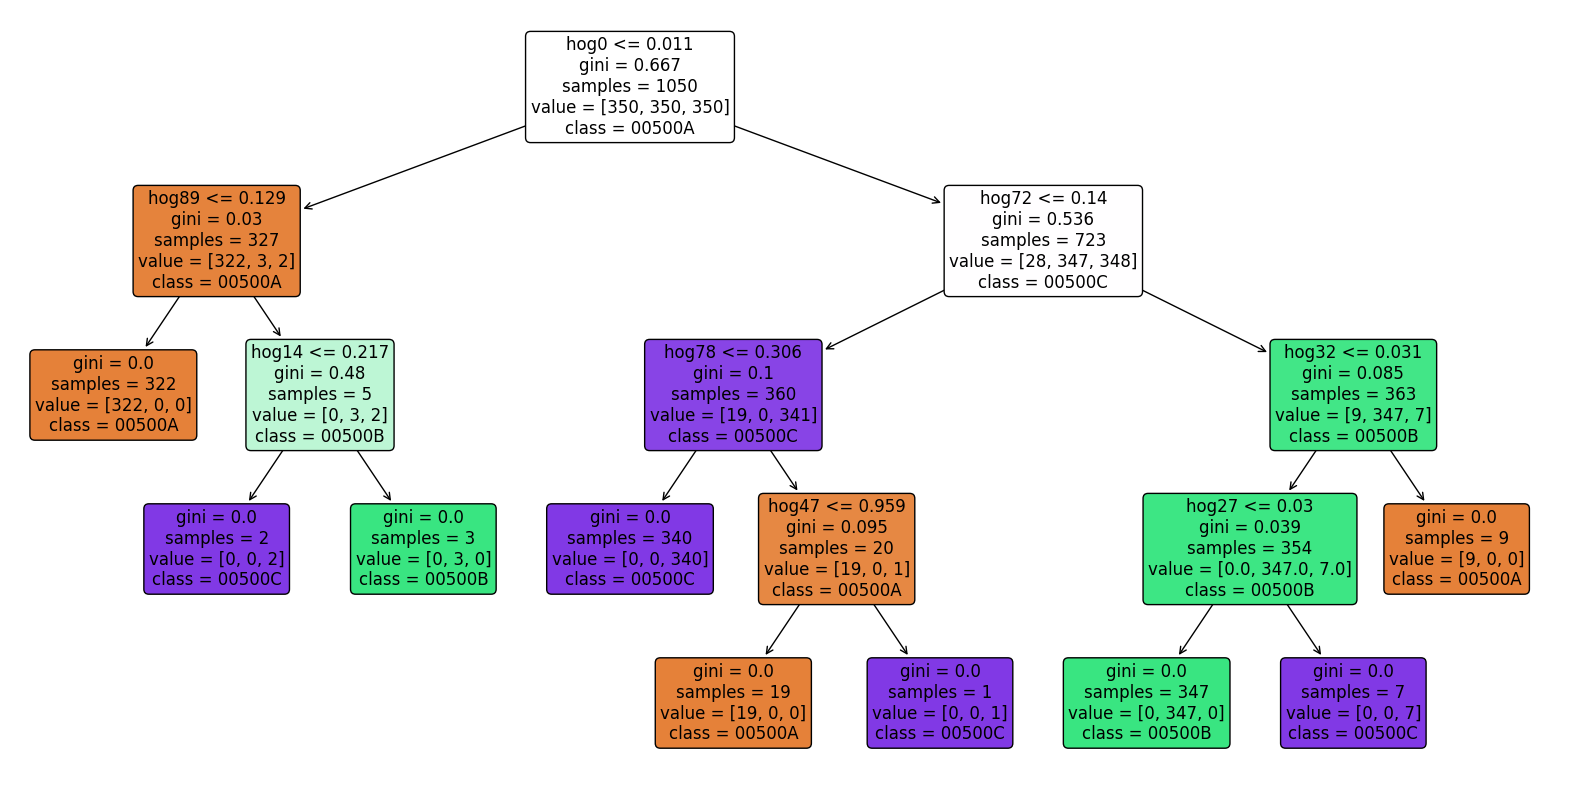

In [10]:

from sklearn import tree
import matplotlib.pyplot as plt
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, 
feature_names=feature_dataset.feature_names, 
class_names=list(feature_dataset.class_map.values()), 
rounded=True, fontsize=12)
plt.show()


Cây quyết định là một cấu trúc giống như sơ đồ luồng, trong đó mỗi nút bên trong đại diện cho một quyết định dựa trên một đặc trưng, 

mỗi nhánh đại diện cho kết quả của quyết định đó, và mỗi nút lá đại diện cho một nhãn lớp (quyết định được đưa ra sau khi tính toán 

tất cả các đặc trưng).

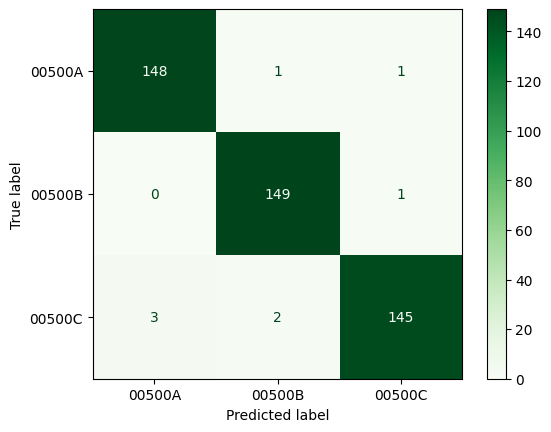

In [11]:
# Kiểm tra các lớp có bị trùng nhau hay không
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dự đoán trên tập test
y_pred = clf.predict(X_test)

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=list(feature_dataset.class_map.values()))
disp.plot(cmap=plt.cm.Greens)
plt.show()


## **Bước 5: Xuất tệp xử lý và bộ phân loại sang mã C++**

Cuối cùng, xuất `HogPipeline` và mô hình phân loại `Classifier` sang mã C++ để sử dụng trên phần cứng như ESP32-CAM.

Các hàm `to_arduino_file` được sử dụng để tạo các tệp tiêu đề C++ từ pipeline và mô hình phân loại, sẵn sàng cho việc triển khai trên thiết bị phần cứng.

In [26]:

print(pipeline.to_arduino_file
      (filename=r'Đường dẫn tới thư mục chứa mã nhúng ESP32-Cam\HogPipeline.h', instance_name='hog'))


print(clf.to_arduino_file(
    filename=r'Đường dẫn tới thư mục chứa mã nhúng ESP32-Cam\HogClassifier.h',
    instance_name='classifier', 
    class_map=feature_dataset.class_map
))

#ifndef UUID2362761382112
#define UUID2362761382112


    #ifndef UUID2362761381008
#define UUID2362761381008

/**
  * HOG(block_size=8, bins=9, cell_size=3)
 */
class HOG {
    public:

        /**
         * Transform input image
         */
         template<typename T, typename U>
        bool transform(T *input, U *output) {
            
    uint16_t f = 0;
    uint16_t block = 0;
    float hog[90] = {0};

    // compute gradients
    for (uint16_t blockY = 0; blockY < 3; blockY++) {
        const uint16_t blockOffsetY = blockY * 224;

        for (uint16_t blockX = 0; blockX < 3; blockX++) {
            const uint16_t blockOffsetX = blockX * 8;
            float hist[9] = {0};

            for (uint16_t _y = 1; _y < 7; _y += 1) {
                const uint16_t rowOffset = blockOffsetY + _y * 28 + blockOffsetX;
                const uint16_t rowOffsetBefore = rowOffset - 28;
                const uint16_t rowOffsetAfter = rowOffset + 28;

                for (uint16_t _x = 1; _x <